In [3]:
from ema_workbench import load_results
from SALib.analyze import sobol
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Original seed analysis

In [4]:
# load results of base case
base_case_results = load_results('../data/output/EMA/seedAnalysisBaseCase.tar.gz')
base_case_outcomes = pd.DataFrame(base_case_results[1])

In [5]:
# load results of bad case
bad_case_results = load_results('../data/output/EMA/seedAnalysisBadCase.tar.gz')
bad_case_outcomes = pd.DataFrame(bad_case_results[1])

In [6]:
def plot_convergence(outcomes, sample, title):
    # create plot axis
    fig, axs = plt.subplots(3, 2, figsize=(20,10))

    # make copy of results
    con = outcomes.copy().head(sample)

    # calculate mean per sample size for all outcomes
    for index, row in con.iterrows():
        con.loc[index, 'averageMeanSpeed'] = con.loc[:index, 'meanSpeed'].mean()
        con.loc[index, 'stdMeanSpeed'] = con.loc[:index, 'meanSpeed'].std()
        con.loc[index, 'averageMeanDensityArea1'] = con.loc[:index, 'meanDensityArea1'].mean()
        con.loc[index, 'stdMeanDensityArea1'] = con.loc[:index, 'meanDensityArea1'].std()
        con.loc[index, 'averageMaxDensityArea1'] = con.loc[:index, 'maxDensityArea1'].mean()
        con.loc[index, 'stdMaxDensityArea1'] = con.loc[:index, 'maxDensityArea1'].std()

    con.reset_index(inplace=True)

    # plot all
    sns.lineplot(
        ax=axs[0][0],
        data=con,
        x=con.index,
        y='averageMeanSpeed'
    )
    axs[0][0].set(xlabel='sample size (iterations)', ylabel='average of \n mean speed values (m/s)')
    sns.lineplot(
        ax=axs[0][1],
        data=con,
        x=con.index,
        y='stdMeanSpeed'
    )
    axs[0][1].set(xlabel='sample size (iterations)', ylabel='std of \n mean speed values (m/s)')
    sns.lineplot(
        ax=axs[1][0],
        data=con,
        x=con.index,
        y='averageMeanDensityArea1'
    )
    axs[1][0].set(xlabel='sample size (iterations)', ylabel='average of \n mean density values (#/m²)')
    sns.lineplot(
        ax=axs[1][1],
        data=con,
        x=con.index,
        y='stdMeanDensityArea1'
    )
    axs[1][1].set(xlabel='sample size (iterations)', ylabel='std of \n mean density values (#/m²)')
    sns.lineplot(
        ax=axs[2][0],
        data=con,
        x=con.index,
        y='averageMaxDensityArea1'
    )
    axs[2][0].set(xlabel='sample size (iterations)', ylabel='average of \n max density values (#/m²)')
    sns.lineplot(
        ax=axs[2][1],
        data=con,
        x=con.index,
        y='stdMaxDensityArea1'
    )
    axs[2][1].set(xlabel='sample size (iterations)', ylabel='std of \n max density values (#/m²)')

    plt.suptitle(title, fontsize=20)
    plt.show()

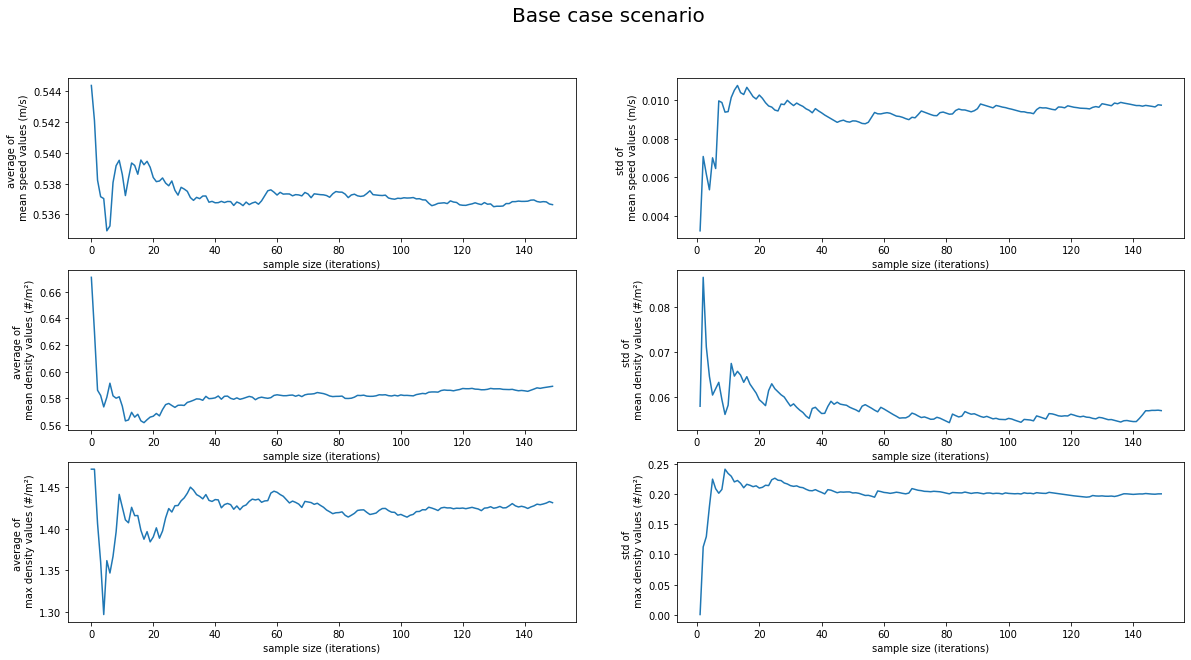

In [7]:
plot_convergence(base_case_outcomes, 150, 'Base case scenario')

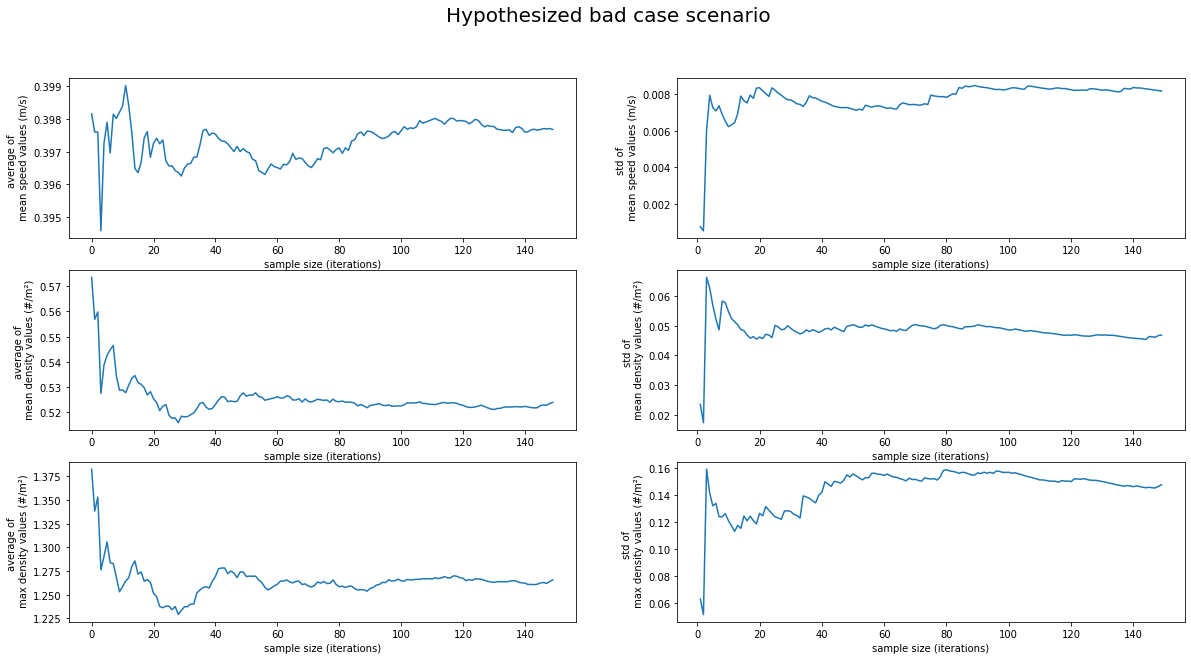

In [8]:
plot_convergence(bad_case_outcomes, 150, 'Hypothesized bad case scenario')

# Additional seed analysis
Check 4 runs with 60 replications for both cases

In [9]:
# load results of base case
add_base_case_results = load_results('../data/output/EMA/seedAnalysisAdditionalBaseCase.tar.gz')
add_base_case_outcomes = pd.DataFrame(add_base_case_results[1])

In [10]:
# load results of bad case
add_bad_case_results = load_results('../data/output/EMA/seedAnalysisAdditionalBadCase.tar.gz')
add_bad_case_outcomes = pd.DataFrame(add_bad_case_results[1])

In [11]:
add_base_case_outcomes.describe()

,AverageMeanSpeed,StdMeanSpeed,AverageMeanDensityArea1,stdMeanDensityArea1,MeanMaxDensityArea1,stdMaxDensityArea1
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.538516,0.011232,0.595860,0.064332,1.432432,0.189077
std,0.001680,0.000717,0.007223,0.006045,0.027538,0.011073
min,0.536004,0.009827,0.585492,0.055611,1.382071,0.168395
25%,0.537191,0.010749,0.589546,0.059580,1.422316,0.185300
50%,0.538473,0.011482,0.596543,0.063911,1.429774,0.190844
75%,0.539853,0.011685,0.599561,0.069600,1.444395,0.197455
max,0.541261,0.012159,0.607226,0.072878,1.484862,0.202125


In [12]:
add_bad_case_outcomes.describe()

,AverageMeanSpeed,StdMeanSpeed,AverageMeanDensityArea1,stdMeanDensityArea1,MeanMaxDensityArea1,stdMaxDensityArea1
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.397169,0.008159,0.526687,0.049001,1.273903,0.155089
std,0.000998,0.000631,0.006296,0.004106,0.015768,0.010654
min,0.395718,0.007182,0.515452,0.042924,1.245902,0.142895
25%,0.396790,0.007858,0.523688,0.047167,1.266504,0.147451
50%,0.397093,0.008215,0.529265,0.048851,1.273519,0.151602
75%,0.397631,0.008486,0.530889,0.050693,1.285261,0.161432
max,0.398637,0.009089,0.533816,0.056494,1.299365,0.175066
